In [148]:
#Wholesale modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Specific Methods
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from IPython.display import display as dsp

In [156]:
def print_file(path, num):
    i = 0
    while i < num:
        for line in open(path):
            print(line)
            i += 1        
            
def parsefile(path, head = False):
    df = pd.read_csv(path, delimiter = '\t', header = None)
    df.rename(columns = {0: 'Review', 1:'Positive'}, inplace = True)
    df['Positive'] = (df['Positive'] == 1)
    if head == True:
        dsp(df.head())
    
    return df

def keyword_columnate(df, keywords):
    for key in keywords:
        df[str(key)] = df['Review'].str.contains(str(key), case = False) 

    
def print_reviews(df):
    for entry in df['Review']:
        print(entry)
        
def print_pos_neg_len(df):
    print('Number of positives: {}\nNumber of negatives: {}'.format(df[df['Positive'] == True]['Positive'].count(),
                                                                df[df['Positive'] == False]['Positive'].count()))
    print('Number of Data Points: {}'.format(df.shape[0]))

def print_mislabeled(data, target, y_pred):
        print("Number of mislabeled points out of a total {} points : {}\n".format(
        data.shape[0],
        (target != y_pred).sum()
    ))

def print_confusion_matrix(target, y_pred):
    print('Confusion Matrix:\n')
    print(confusion_matrix(target, y_pred))

def print_train_test(bnb, data, target, size):
    X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size = size, random_state = 101) #rnd_st is random seed
    print('On {}% holdout sample: {}% accuracy.\n'.format(size * 100, str(
        round(bnb.fit(X_train, Y_train).score(X_test, Y_test),2))))

def print_cross_valid(bnb, data, target, folds):
    print('Cross Validation Scores with {} Folds:\n'.format(folds))
    print(cross_val_score(bnb, data, target, cv = folds))


In [150]:
#Classifier Definitions
        
def classifier_one(df, keywords, print_perf = True):
    data = df[keywords]
    target = df['Positive']

    #Bernoulli Naive Bayes Classifier
    bnb = BernoulliNB()
    bnb.fit(data, target)
    y_pred = bnb.predict(data)
    
    if print_perf == True:
        print('Classifier Performance:\n')
        print_mislabeled(data, target, y_pred)
        print_confusion_matrix(target, y_pred)
        print_train_test(bnb, data, target, 0.2)
        print_cross_valid(bnb, data, target, 5)
        
        

#def fit_pred()

In [151]:
df = parsefile('data/yelp_labelled.txt', head = True)
imdb = parsefile('data/imdb_labelled.txt', head = True)

,Review,Positive
0,Wow... Loved this place.,True
1,Crust is not good.,False
2,Not tasty and the texture was just nasty.,False
3,Stopped by during the late May bank holiday of...,True
4,The selection on the menu was great and so wer...,True


,Review,Positive
0,"A very, very, very slow-moving, aimless movie ...",False
1,Not sure who was more lost - the flat characte...,False
2,Attempting artiness with black & white and cle...,False
3,Very little music or anything to speak of.,False
4,The best scene in the movie was when Gerardo i...,True


In [152]:
dfpos = df[df['Positive'] == True]
dfneg = df[df['Positive'] == False]



In [153]:
#keywords = ['great','good', 'bad', 'not good', 'awful', 'service', 'fast', 'dissapointing', 'slow', 'tasty', 'food', 'do not', 'love','terrible']
#keywords = ['terrible','smelly','tasteless','bad','slow','lost','rude','rubbery']
keywords_good = ['know','back','good', 'best','love', 'wonderful', 'perfect', 'stars','nice', 'soon', 'like', 'complete']

keyword_columnate(df, keywords_good)
keyword_columnate(imdb, keywords_good)

dsp(df.head())
print_pos_neg_len(df)
dsp(imdb.head())
print_pos_neg_len(imdb)

,Review,Positive,know,back,good,best,love,wonderful,perfect,stars,nice,soon,like,complete
0,Wow... Loved this place.,True,False,False,False,False,True,False,False,False,False,False,False,False
1,Crust is not good.,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,True,False,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,False,False,False,False,False,False,False,False,False,False,False,False


Number of positives: 500
Number of negatives: 500
Number of Data Points: 1000


,Review,Positive,know,back,good,best,love,wonderful,perfect,stars,nice,soon,like,complete
0,"A very, very, very slow-moving, aimless movie ...",False,False,False,False,False,False,False,False,False,False,False,False,False
1,Not sure who was more lost - the flat characte...,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Attempting artiness with black & white and cle...,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Very little music or anything to speak of.,False,False,False,False,False,False,False,False,False,False,False,False,False
4,The best scene in the movie was when Gerardo i...,True,False,False,False,True,False,False,False,False,False,False,False,False


Number of positives: 386
Number of negatives: 362
Number of Data Points: 748


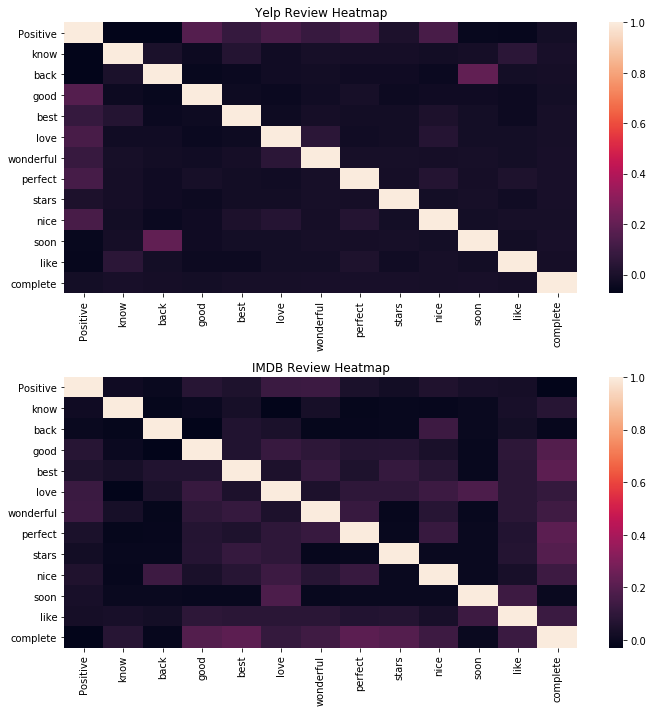

In [154]:
plt.figure(figsize = (10,10))

plt.subplot(2,1,1)
#print('Yelp Review Heatmap')
sns.heatmap(df.corr())
plt.title('Yelp Review Heatmap')

plt.subplot(2,1,2)
#print('IMDB Review Heatmap')
sns.heatmap(imdb.corr())
plt.title('IMDB Review Heatmap')

plt.tight_layout()
plt.show()

In [155]:
classifier_one(df, keywords)
classifier_one(imdb, keywords)

Classifier Performance:

Number of mislabeled points out of a total 1000 points : 381

Confusion Matrix:

[[462  38]
 [343 157]]
On 20.0% holdout sample: 0.66% accuracy.

Cross Validation Scores with {} Folds:

[0.615 0.635 0.61  0.595 0.63 ]
Classifier Performance:

Number of mislabeled points out of a total 748 points : 309

Confusion Matrix:

[[316  46]
 [263 123]]
On 20.0% holdout sample: 0.61% accuracy.

Cross Validation Scores with {} Folds:

[0.52980132 0.60666667 0.53691275 0.6442953  0.55704698]
